In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import cmath
import warnings
from scipy.io.wavfile import write
from scipy.io.wavfile import read

from scipy import signal

In [5]:
# Necessary classes 

class dft(object):
  def __init__(self, x, fs, K = None):
    self.x = x
    self.fs = fs
    self.N = len(x)
    if K == None: 
      K = len(x)
    self.K = K 
    self.f = np.arange(self.K)*self.fs/self.N
    self.f_c = np.arange(-np.ceil(K/2)+1,np.floor(self.K/2)+1)*self.fs/self.K

  def solve(self): 
    X = np.fft.fft(self.x, self.K)/np.sqrt(self.N)
    X_c = np.roll(X, np.int(np.ceil(self.K/2-1)))

    return [self.f, X, self.f_c, X_c]

class idft(object):
  def __init__(self, X, fs, N, K=None):
    self.X = X
    self.fs = fs
    self.N = N
    self.K = K
    if K == None:
      self.K = int(len(X)/2)-1

  def solve(self):
    x = np.zeros(self.N)
    for n in range(self.N):
      x[n] = 1/np.sqrt(self.N) * self.X[0] * np.exp(1j*2*cmath.pi*0*n/self.N)
      for k in range(1, self.K+1):
        x[n] = x[n] + 1/np.sqrt(self.N)*self.X[k]*np.exp(1j*2*cmath.pi*k*n/self.N)
        x[n] = x[n] + 1/np.sqrt(self.N)*np.conj(self.X[k])*np.exp(-1j*2*cmath.pi*k*n/self.N)
    Ts = 1/self.fs
    Treal = np.arange(self.N)*Ts
    return x, Treal

  def solve_ifft(self):
    x=np.fft.ifft(self.X,self.N)*np.sqrt(self.N)

    Ts= 1/self.fs
    Treal= np.arange(self.N)*Ts

    return x, Treal

# Create Gaussian pulse class
class Gaussian(object):
  def __init__(self, T, mu, sigma, fs):
    self.mu = mu
    self.N = np.int(np.floor(T*fs))      #T=NTs, so N = Tfs
    self.t = np.arange(-T, T, 1/fs)
    self.sig = np.exp(-(self.t-mu)**2 / (2 * sigma**2))
    self.gaussian = np.exp(-(self.t-mu)**2 / (2 * sigma **2))



# Problem 1.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

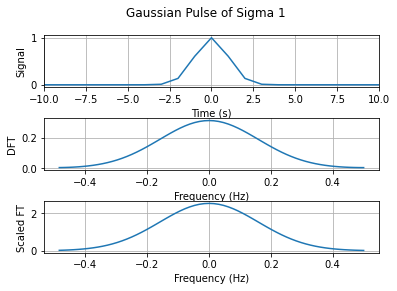

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

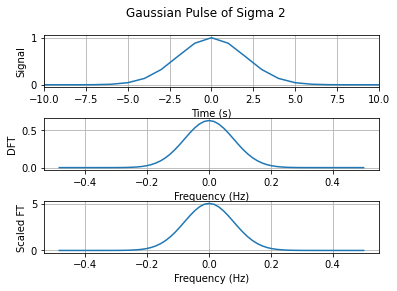

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

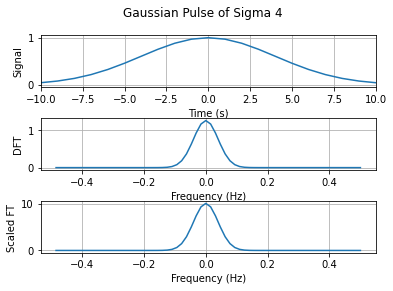

In [6]:
def q_12_gaussian_ft(mu, sigma, f):
  gaussian_ft = np.exp(-2* math.pi**2 *f**2 * sigma**2 + 1j * 2* math.pi * f * mu) * np.sqrt(2 * math.pi) * sigma
  return gaussian_ft 

def q_12(mu, sigmas, T, fs):
  for sigma in sigmas:
    pulse = Gaussian(T, mu, sigma, fs)
    currdft = dft(pulse.gaussian, fs)
    [freqs, X, f_c, X_c] = currdft.solve()
    ft = q_12_gaussian_ft(mu, sigma, f_c)
    fig, axs = plt.subplots(3)
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    fig.suptitle('Gaussian Pulse of Sigma ' + str(sigma))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    axs[0].plot(pulse.t, pulse.gaussian)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_xlim((-10,10))
    
    axs[0].set_ylabel('Signal')
    axs[1].plot(f_c, abs(X_c))
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('DFT')
    axs[2].plot(f_c, abs(ft))
    axs[2].set_xlabel('Frequency (Hz)')
    axs[2].set_ylabel('Scaled FT')
    plt.show()

if __name__ == '__main__':
  sigmas = [1, 2, 4]
  q_12(0, sigmas, 32, 1)
  

# Problem 1.3 


In [ ]:
# See Lab Report

# Problem 2.1

In [ ]:
from scipy.io.wavfile import write
from scipy.io.wavfile import read

from scipy import signal
import sounddevice as sd

class recordsound():
  def __init__(self, T, fs):
    self.T = T
    self.fs = fs

  def solve(self):
    print('start recording')
    voiceRecording = sd.rec(int(self.T * self.fs), self.fs, 1)
    sd.wait()
    print('end recording')
    write('myvoice.wav', self.fs, voiceRecording)

    return voiceRecording


def q_21(x, x_bandlim, Treal, X_c, f_c, X_band):

    """
    Question 2.1_create bandlimited signal, plot the original and limited signal,
    save the bandlimited voice signal
    """

    # Plot
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Original Signal + Spectrum' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    axs[0].plot(Treal, x)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(f_c, X_c)
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('DFT')

    plt.show()

    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Bandlimited Signal + Spectrum' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    axs[1].plot(Treal, x_bandlim)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Signal')
    axs[0].plot(f_c, X_band)
    axs[0].set_xlabel('Frequency')
    axs[0].set_ylabel('DFT')
    plt.show()


def bandlimitVoice(x, fs, fthreshold):
    N = len(x)
    bandlimitDFT = dft(x, fs)
    [freqs, X, f_c, X_c] = bandlimitDFT.solve()
    minFreq = np.min(np.where(f_c >= -fthreshold)[0])
    maxFreq = np.max(np.where(f_c <= fthreshold)[0])

    X_band = np.concatenate(( np.zeros(minFreq+1), X_c[minFreq: maxFreq] ,  np.zeros( N - maxFreq-1)))
    X_band_n = np.roll( X_band, np.int(np.ceil( N / 2 )))


    bandlimitIDFT = idft(X_band_n, fs, N)
    x_bandlim, Treal = bandlimitIDFT.solve_ifft()

    return x_bandlim.real, Treal, X_c, f_c, X_band

# Problem 2.2

In [ ]:
def q_22(x, modG, fs):
    N = len(x)
    n = np.arange(N)
    discrete_mod = np.exp(2*math.pi*1j*modG*n /fs)*x
    return discrete_mod

def cos_modulation(x, modG, fs):
    N = len(x)
    n = np.arange(N)
    cosine_modulation = np.cos(2*math.pi*modG*n/fs)*x
    return cosine_modulation

def q_22_graph(x_bandlim, exp_modulation, fs, Treal):
    DFT = dft(x_bandlim, fs)
    [freqs, X, f_c, X_c] = DFT.solve()

    DFT_modulation = dft(x_modulation, fs)
    [freqs, X, f_modulation, X_modulation] = DFT_modulation.solve()

    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('original signal and modulated signal' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    axs[0].plot(Treal, x_bandlim)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(Treal, exp_modulation)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Signal')
    plt.show()


    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('original signal and modulated signal spectrum' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    axs[0].plot(f_c, X_c)
    axs[0].set_xlabel('Frequency')
    axs[0].set_ylabel('DFT')
    axs[1].plot(f_modulation, X_modulation)
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('DFT')
    plt.show()

# Problem 2.3

In [ ]:
def q_23(x_bandlim, x_modulation, fs, Treal):
    DFT = dft(x_bandlim, fs)
    [freqs, X, f_c, X_c] = DFT.solve()

    DFT_modulation = dft(x_modulation, fs)
    [freqs, X, f_modulation, X_modulation] = DFT_modulation.solve()

    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('original signal and modulated signal' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    axs[0].plot(Treal, x_bandlim)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(Treal, x_modulation)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Signal')
    plt.show()


    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('original signal and modulated signal spectrum' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    axs[0].plot(f_c, X_c)
    axs[0].set_xlabel('Frequency')
    axs[0].set_ylabel('DFT')
    axs[1].plot(f_modulation, X_modulation)
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('DFT')
    plt.show()

# Problem 2.4

In [ ]:
# See MAIN

# Problem 2.5

In [ ]:
def q_25(z, modG, fs, fthreshold):
    N = len(z)
    DFT_new = dft(z, fs)
    [freqs, X, f_Zc, Z_c] = DFT_new.solve()

    y_demodulation = cos_modulation(z, modG, fs)
    DFT = dft(y_demodulation, fs)
    [freqs, Y, f_c, Y_demodulation] = DFT.solve()


    minFreq = np.min( np.where(f_c >= -fthreshold)[0])
    maxFreq = np.max( np.where(f_c <= fthreshold)[0])
    Y_demod = np.concatenate(( np.zeros(minFreq+1), Y_demodulation[minFreq: maxFreq]*2 ,  np.zeros( N - maxFreq-1)))
    Y_demod_n = np.roll( Y_demod, np.int(np.ceil( N / 2 )) )
    iDFT = idft(Y_demod_n, fs, N)
    y_demod, Treal = iDFT.solve_ifft()

    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('demodulated signal spectrum' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    axs[0].plot(f_c, Y_demodulation)
    axs[0].set_xlabel('Frequency')
    axs[0].set_ylabel('DFT')
    axs[1].plot(f_c, Y_demod)
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('DFT')
    plt.show()


    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('original signal and modulated signal spectrum' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    axs[0].plot(f_Zc, Z_c)
    axs[0].set_xlabel('Frequency')
    axs[0].set_ylabel('DFT')
    axs[1].plot(f_c, Y_demod)
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('DFT')
    plt.show()

    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('mixed signal and demodulated signal' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    axs[0].plot(Treal, z)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(Treal, y_demod.real)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Signal')
    plt.show()

    return y_demod.real

# MAIN

In [ ]:
if __name__ == '__main__':
  fs = 40000
  T = 3
  fthreshold = 4000
  g_1 = 5000

  voice = recordsound(T, fs)
  x = voice.solve().reshape(T*fs)
  fs, x = read("myvoice.wav")
  x_bandlim, Treal, X_c, f_c, X_band = bandlimitVoice(x, fs, fthreshold)

  # Question 2.1 
  q_21(x, x_bandlim, Treal, X_c, f_c, X_band)

  # Question 2.2
  x_modulation = q_22(x, g_1, fs)
  q_22_graph(x_bandlim, x_modulation, fs, Treal)

  # Question 2.3 
  x_modulation = cos_modulation(x, g_1, fs)
  q_23(x_bandlim, x_modulation, fs, Treal)

  # Question 2.4
  g_2 = 13000
  voice_Other = recordsound(T, fs)
  x_Other = voice_Other.solve().reshape(T*fs)
  fs_Other, x_Other = read("myvoice.wav")
  x_bandlim_Other, Treal_Other, X_c_Other, f_c_Other, X_band_Other = bandlimitVoice(x_Other, fs, fthreshold)

  q_21(x, x_bandlim, Treal, X_c, f_c, X_band)
  x_modulation_Other = cos_modulation(x_Other, g_2, fs)
  q_23(x_bandlim_Other, x_modulation_Other, fs, Treal_Other)

  z = x_modulation + x_modulation_Other

  # Question 2.5
  voice_one_recover = q_25(z, g_1, fs, fthreshold)
  voice_two_recover = q_25(z, g_2, fs, fthreshold)

  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('demodulated signals' )
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
  axs[0].plot(Treal, voice_one_recover)
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('x(t)')
  axs[1].plot(Treal, voice_two_recover)
  axs[1].set_xlabel('Time (s)')
  axs[1].set_ylabel('y(t)')
  plt.show()
